<a href="https://colab.research.google.com/github/CC0R0NAD0/Segmentation-using-multiple-vision-machine-paradigms/blob/main/img_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###############################################################
#                      Authors:                               #
#                  Carlos Coronado                            #
#                  Adrián Monge                               #
#                   ITCR MT 8004                              #
#   Tarea Sistemas de visión: Segmentación                    #
###############################################################


#CAMBIO DE COLOR EN LAS IMAGENES PARA PRUEBAS DE ROBUSTEZ


from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos


Mounted at /content/drive


(287, 780, 3)


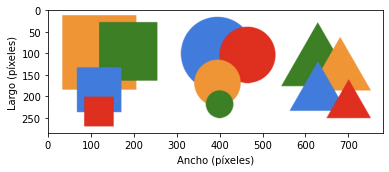

In [ ]:
import cv2  # libreria trabajo con imagenes
import matplotlib.pyplot as plt # libreria trabajo con graficos

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla



#Se carga la imagen de entrada
image = cv2.imread('imagenes/img_tarea_descargada.png')
#Etiquetas ejes
plt.xlabel("Ancho (píxeles)")
plt.ylabel("Largo (píxeles)")
#Se imprime la forma de la imagen para conocer las dimensiones
print(image.shape)


#Se cambia espacio de color a RGB
image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Se visualiza la imagen original
plt.imshow(image_plt)
plt.show()

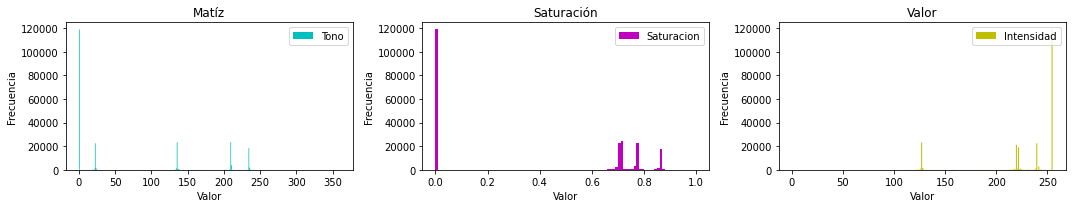

(287, 780, 3)


In [ ]:
import matplotlib.colors as colors #libreria para trabajar espacio color
import numpy as np  #libreria para manejo de arrays o arreglos


#SEGMENTACION POR COLOR, GRAFICOS HSV************************************


array=np.asarray(image)  #imagen a formato array
arr=(array.astype(float))/255.0   #se escalan los valores
img_hsv = colors.rgb_to_hsv(arr[...,:3])  # se cambia a hsv


#Imprimir graficos, se escoge tamaño
plt.subplots(figsize=(15, 3))


lu1=img_hsv[...,0].flatten()   #Se aplana el arreglo corrspondiente al canal h
plt.subplot(1,3,1) #ubicacion de la imagen
#se calcula histograma de h en rango de grados
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='c', label='Tono')
#Se imprimen las etiquetas
plt.title("Matíz")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu2=img_hsv[...,1].flatten()   #Se aplana el arreglo corrspondiente al canal s
plt.subplot(1,3,2)   #ubicacion de la imagen
#se calcula histograma de h en rango 1.0           
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='m', label='Saturacion')
#Se imprimen las etiquetas
plt.title("Saturación")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu3=img_hsv[...,2].flatten()   #Se aplana el arreglo corrspondiente al canal v
plt.subplot(1,3,3)   #ubicacion de la imagen
#se calcula histograma de h en rango de 255                
plt.hist(lu3*255,bins=256,range=(0.0,255.0),histtype='stepfilled', color='y', label='Intensidad')
#Se imprimen las etiquetas
plt.title("Valor")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

#ajuste de tamaño de imagenes
plt.tight_layout()
plt.show() # se muestran las imagenes

print(img_hsv.shape) #tamaño de arreglo con 3 canales

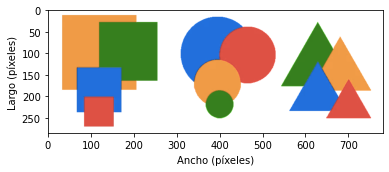

In [ ]:
# Se separa cada canal de hsv para manipularlos
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]

# Se copian los valores para recolorear
h_new = h
s_new = s
v_new = v


# Se guardan las dimensiones para hacer un ciclo y recorrer la imagen
h_img = image.shape[0]
w_img = image.shape[1]



# Se definen visualmente los colores en el canal h con los picos
val_color1 =  235  #ROJO
val_color2 =  210 #AMARILLO
val_color3 =  135  #VERDE
val_color4 =  25  #AZUL


# Se define un rango de aceptación de colores
por_desvi = 0.05 # 5%


#---------------------------------------------------------------------

# Para los casos de intercambiar color
# Se almacenan los valores de saturacion dentro del rango H
val_sat1 =  []  #ROJO
val_sat2 =  [] #AMARILLO
val_sat3 =  []  #VERDE
val_sat4 =  []  #AZUL

#Se emplea un ciclo se revisa cada pixel y el valor de H y si cumple se almacena
#cada valor de saturación S en el array

for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        val_sat1.append(s[i,j])

      elif ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        val_sat2.append(s[i,j])

      elif ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        val_sat3.append(s[i,j])

      elif ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        val_sat4.append(s[i,j])


#----------------------------------------------------------------------------
# Para los casos de intercambiar color
# Se almacenan los valores de intencsidad I o Valor V dentro del rango H

val_1 =  []  #ROJO
val_2 =  [] #AMARILLO
val_3 =  []  #VERDE
val_4 =  []  #AZUL


#Se emplea un ciclo se revisa cada pixel y el valor de H y si cumple se almacena
#cada valor de Intensidad I o Valor V en el array

for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        val_1.append(v[i,j])

      elif ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        val_2.append(v[i,j])

      elif ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        val_3.append(v[i,j])

      elif ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        val_4.append(v[i,j])


#--------------------------------------------------------------------------

# Para la ligera variacion de color se define un rango para todos los colores
#dentro de un porcentaje menor al aceptado 3% y de forma aleatoria

porc_var = int(360*0.03)  #Variacion de color 3%

import random #libreria para funciones aleatorias

cambio = random.randint(-porc_var,porc_var) #rango +/- para valor de HSV

# Se recorre la imagen con ciclos
for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        #Si se está dentro del rango se suma el cambio y se escala de 0.0 a 1.0
        h_new[i,j] = ((val_color1 + cambio )/360.0) 
        s_new[i,j] = np.mean(val_sat4) + (cambio/360)
        #v_new[i,j] = np.mean(val_4) + (cambio/360)

      if ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        #Si se está dentro del rango se suma el cambio y se escala de 0.0 a 1.0
        h_new[i,j] = ((val_color2  + cambio )/360.0) 
        s_new[i,j] = np.mean(val_sat3) + (cambio/360)
        #v_new[i,j] = np.mean(val_3) + (cambio/360)


      if ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        #Si se está dentro del rango se suma el cambio y se escala de 0.0 a 1.0
        h_new[i,j] = ((val_color3 + cambio )/360.0) 
        s_new[i,j] = np.mean(val_sat2) + (cambio/360)
        #v_new[i,j] = np.mean(val_2) + (cambio/360)


      if ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        #Si se está dentro del rango se suma el cambio y se escala de 0.0 a 1.0
        h_new[i,j] = ((val_color4 + cambio )/360.0) 
        s_new[i,j] = np.mean(val_sat1) + (cambio/360)
        #v_new[i,j] = np.mean(val_1) + (cambio/360)


#Se copia la variable con los 3 canales originales
recolor = img_hsv
# Se modifica cada color con los nuevos array de canal modificados
recolor[...,0] = h_new 
recolor[...,1] = s_new
recolor[...,2] = v_new


#Se reconvierte a RGB
new_color = colors.hsv_to_rgb(recolor[...,:3])

#Como la imagen estaba en BGR por CV2 se pasa a RGB
new_color_sh = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)
#Etiquetas ejes
plt.xlabel("Ancho (píxeles)")
plt.ylabel("Largo (píxeles)")
plt.imshow(new_color_sh) # Se muestra la imagen

#Se guarda en la carpeta
plt.imsave("salida_cambiada.png",new_color_sh)
plt.show()